In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten
from tensorflow.keras.models import Sequential,load_model,Model
from sklearn.model_selection import train_test_split
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train = pd.read_csv('../input/digit-recognizer/train.csv')
test = pd.read_csv('../input/digit-recognizer/test.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_arr  = train.iloc[:,1:].copy()
test_arr  = test.iloc[:,:].copy()
train_arr = train_arr.to_numpy().reshape(len(train_arr),28,28)
train_y = train.iloc[:,0].to_numpy()
test_arr = test_arr.to_numpy().reshape(len(test_arr),28,28)

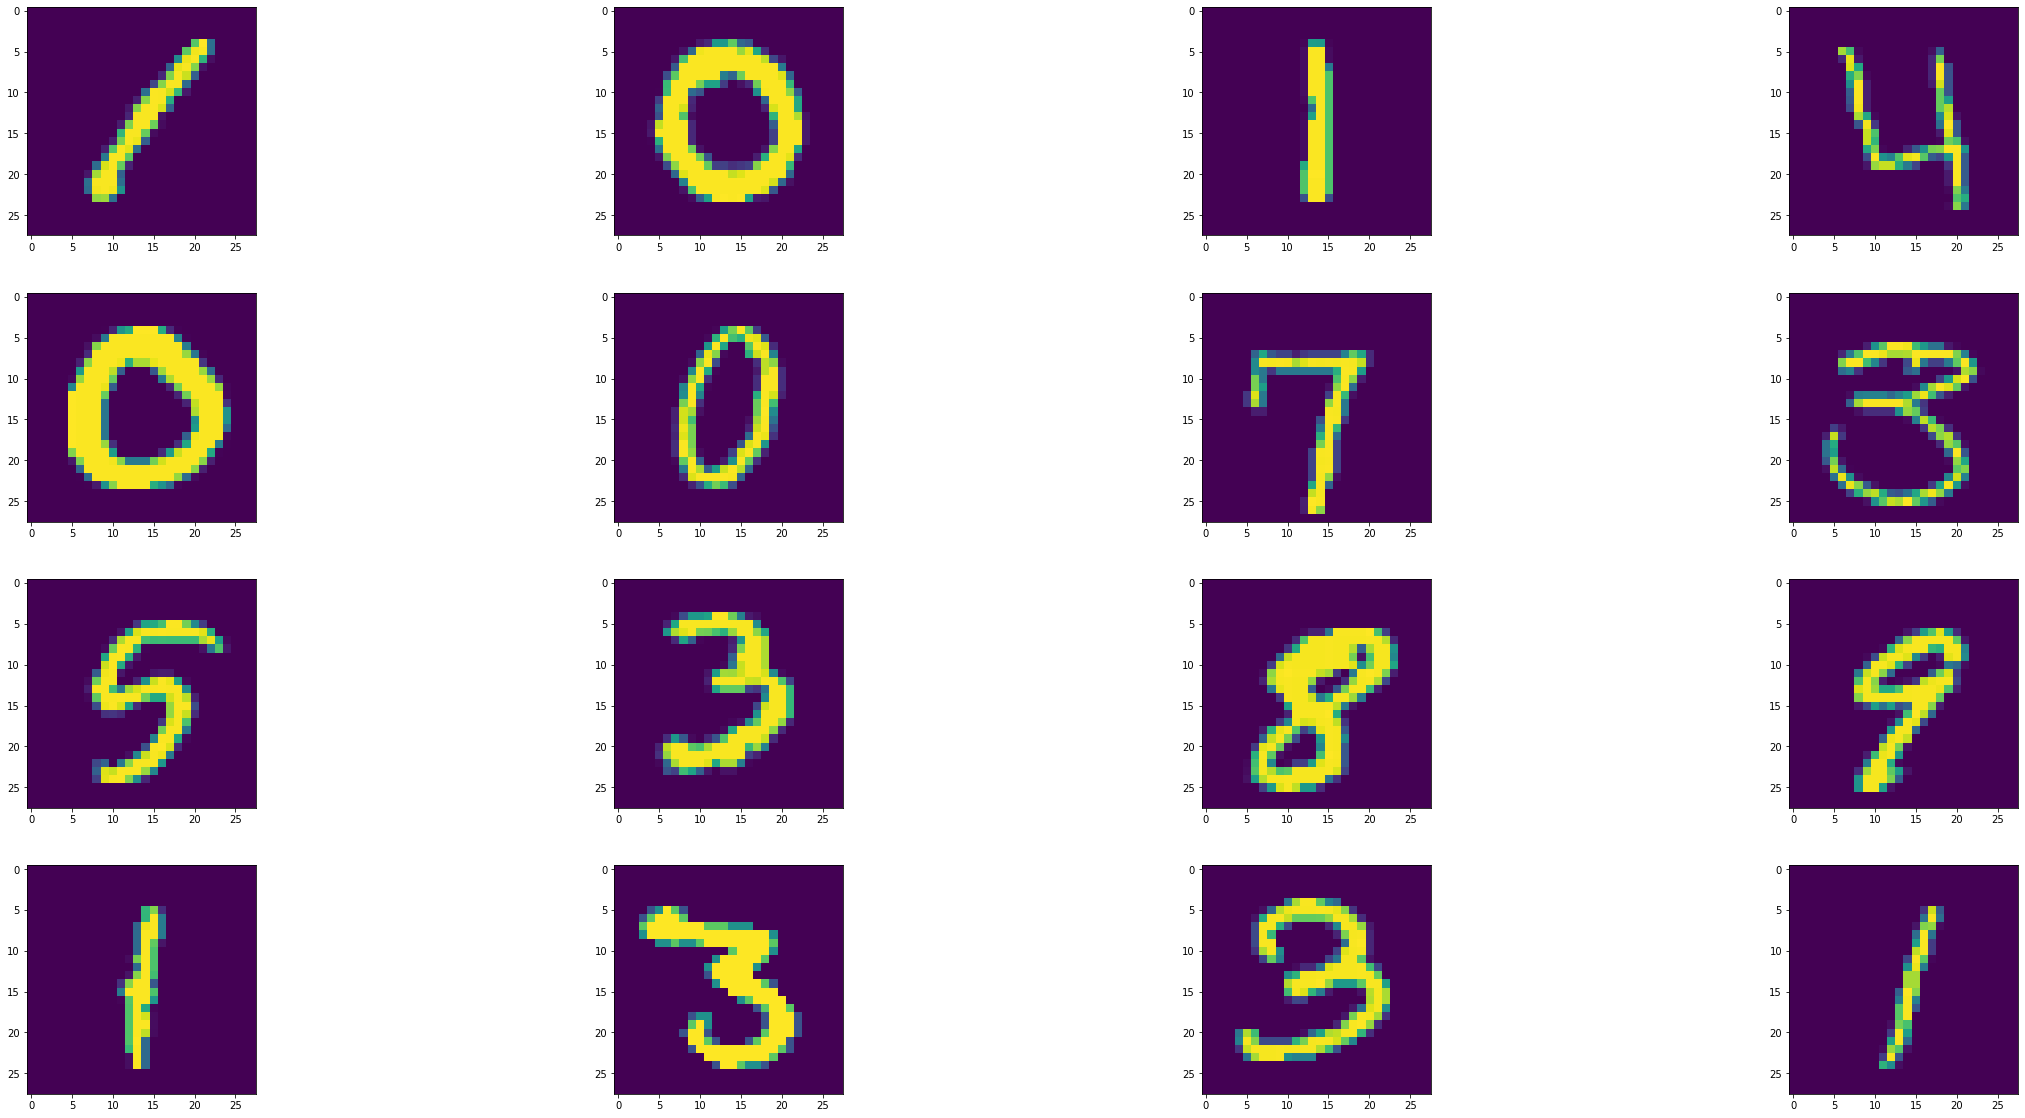

In [5]:
fig = plt.figure(figsize=(40, 20))
rows = 4
columns = 4
grid = plt.GridSpec(rows, columns, wspace = .25, hspace = .25)
for i in range(rows*columns):
    exec (f"plt.subplot(grid{[i]})")
    plt.imshow(train_arr[i])
    

In [6]:
label = train["label"]
label.value_counts()
train = StandardScaler().fit_transform(train)
pca = PCA(n_components=2)
pca_res = pca.fit_transform(train)

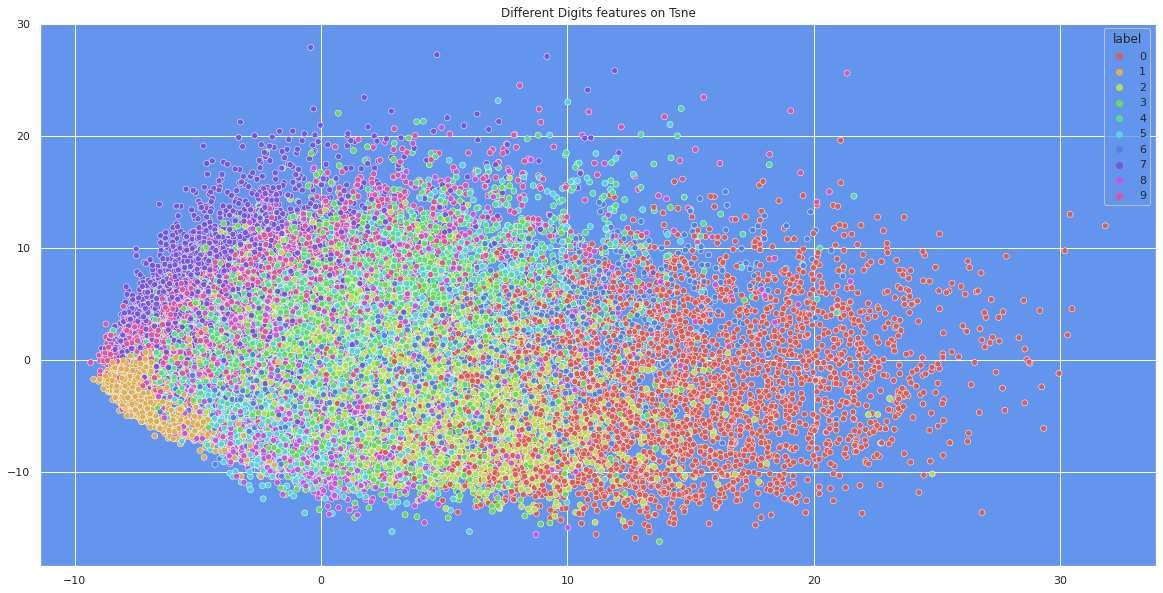

In [7]:
fig = plt.figure(figsize=(20, 10))
sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})
sns.scatterplot(x = pca_res[:,0], y = pca_res[:,1], hue = label, palette = sns.hls_palette(10), legend = 'full');
plt.title("Different Digits features on Tsne")
plt.show()

In [8]:
train_arr = train_arr.astype("float")/255
x_test = test_arr.astype("float")/255
train_arr = train_arr.reshape(train_arr.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [9]:
from tensorflow.keras.utils import to_categorical
train_y = to_categorical(train_y)

In [10]:
networks = 10
model = [0] *networks
for j in range(networks):
    model[j] = Sequential()

    model[j].add(Conv2D(100,kernel_size=(3,3),activation="relu", input_shape = (28, 28, 1)))
    model[j].add(Conv2D(200,kernel_size = (3,3),activation="relu"))
    model[j].add(MaxPooling2D(pool_size= (3,3)))
    model[j].add(Flatten())
    
    model[j].add(Dense(200,activation="relu"))
    model[j].add(Dense(100,activation="sigmoid"))
    model[j].add(Dense(train_y.shape[1],activation="softmax"))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [11]:
from keras.callbacks import LearningRateScheduler
callback = LearningRateScheduler(lambda i: 1e-3 * 0.97 ** i)
history = [0] * networks
epochs = 30
for i in range(networks):
    x_train, x_val, y_train, y_val = train_test_split(train_arr,train_y, test_size = 0.1)
    history[i] = model[i].fit(x_train,y_train, batch_size=1000,
        epochs = epochs,
        validation_data = (x_val,y_val), callbacks=[callback], verbose=0)
    print(f"Ensemble CNN {i+1}: Epochs: {epochs}, Train accuracy: {max(history[i].history['accuracy'])}, Validation accuracy: {max(history[i].history['val_accuracy']) } ")

Ensemble CNN 1: Epochs: 30, Train accuracy: 0.999656081199646, Validation accuracy: 0.9909523725509644 
Ensemble CNN 2: Epochs: 30, Train accuracy: 0.9998942017555237, Validation accuracy: 0.9923809766769409 
Ensemble CNN 3: Epochs: 30, Train accuracy: 0.9999206066131592, Validation accuracy: 0.9885714054107666 
Ensemble CNN 4: Epochs: 30, Train accuracy: 0.9998412728309631, Validation accuracy: 0.9923809766769409 
Ensemble CNN 5: Epochs: 30, Train accuracy: 0.9997883439064026, Validation accuracy: 0.991428554058075 
Ensemble CNN 6: Epochs: 30, Train accuracy: 0.9999206066131592, Validation accuracy: 0.9921428561210632 
Ensemble CNN 7: Epochs: 30, Train accuracy: 0.9998148083686829, Validation accuracy: 0.9900000095367432 
Ensemble CNN 8: Epochs: 30, Train accuracy: 0.9998677372932434, Validation accuracy: 0.9904761910438538 
Ensemble CNN 9: Epochs: 30, Train accuracy: 0.9998942017555237, Validation accuracy: 0.9921428561210632 
Ensemble CNN 10: Epochs: 30, Train accuracy: 0.9998148083

In [12]:
max_val = 0
pos = 0
for i,_ in enumerate(history):
    new_val_acc =  max(history[i].history['val_accuracy'])
    if new_val_acc>max_val:
        max_val = new_val_acc
        pos = i
print(f"CNN model {pos} with val Accuracy:{max_val}")
pred = model[pos+1].predict(x_test)
predictions = np.argmax(pred,axis=1)

CNN model 1 with val Accuracy:0.9923809766769409


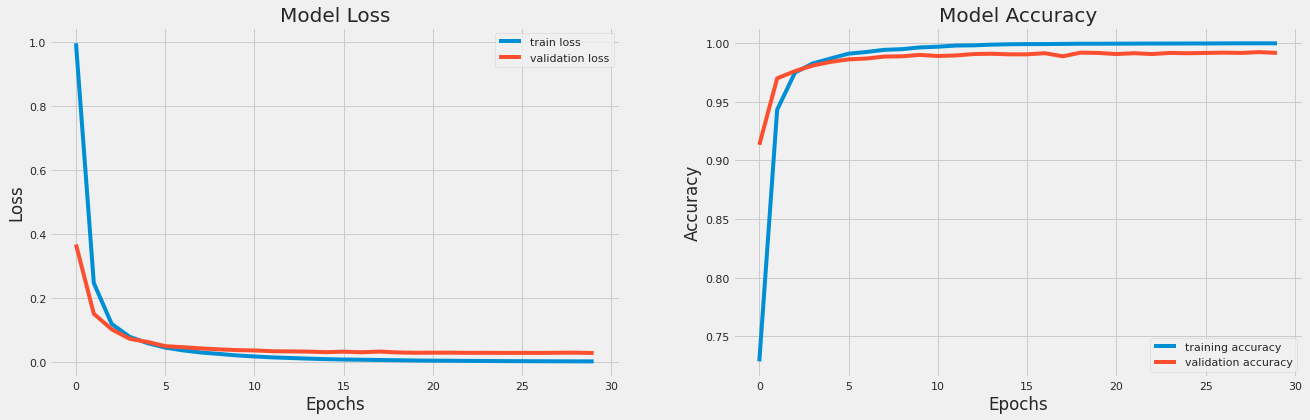

In [13]:
plt.style.use("fivethirtyeight")
plt.figure(figsize = (20,6))
plt.subplot(1, 2, 1)
plt.plot(history[pos].history['loss'])
plt.plot(history[pos].history['val_loss'])
plt.title("Model Loss",fontsize=20)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train loss', 'validation loss'], loc ='best')

plt.subplot(1, 2, 2)
plt.plot(history[pos].history['accuracy'])
plt.plot(history[pos].history['val_accuracy'])
plt.title("Model Accuracy",fontsize=20)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['training accuracy', 'validation accuracy'], loc ='best')
plt.show()

In [14]:
submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)), "Label": predictions})
submissions.to_csv("submission.csv", index=False, header=True)